In [1]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings       
warnings.filterwarnings("ignore")

In [2]:
#reading data to python environment
pd.set_option('display.max_columns', 9994)
df = pd.read_excel("Sample - Superstore (1).xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


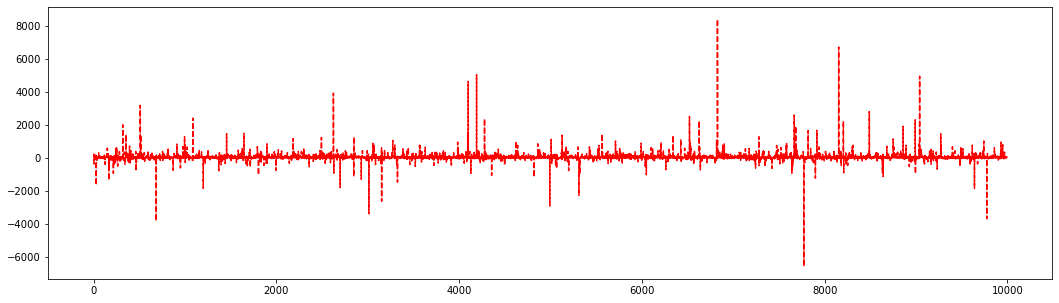

In [21]:
df['Profit'].plot(figsize=(18,5),ls='--', c='red');


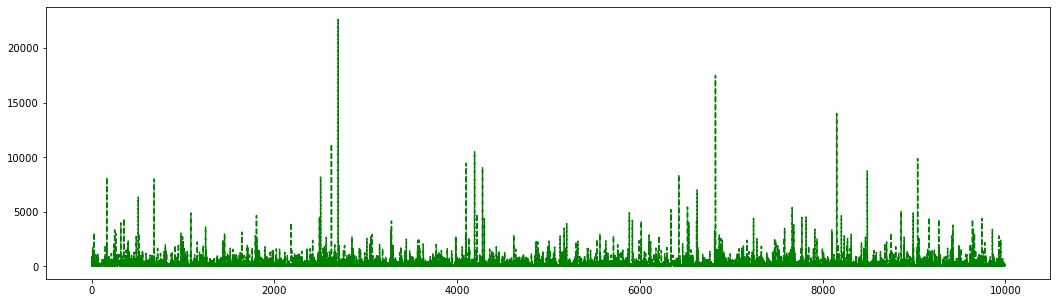

In [13]:
df['Sales'].plot(figsize=(18,5),ls='--', c='green');


In [22]:
df = df.set_index(['Order Date'])

RESAMPLING

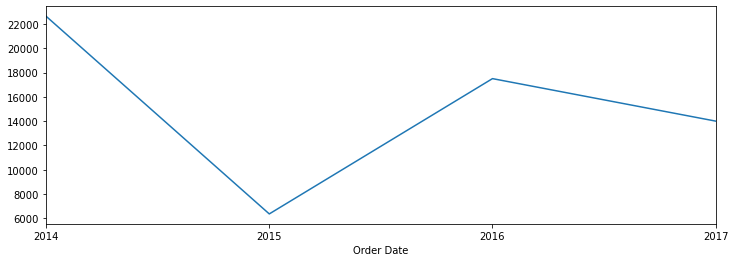

In [29]:
#year end frequency is 'A'
df.resample(rule='A').max()['Sales'].plot(figsize=(12,4))
plt.show()

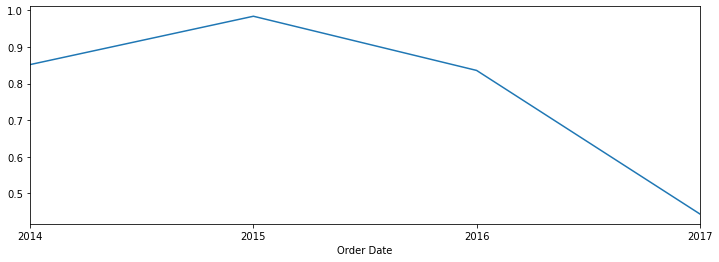

In [28]:
df.resample(rule='A').min()['Sales'].plot(figsize=(12,4))
plt.show()

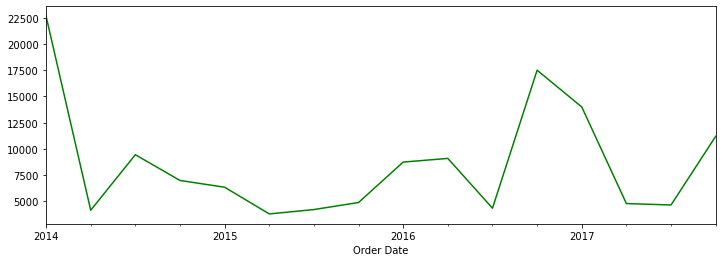

In [32]:
#quaterly start
df.resample(rule='QS').max()['Sales'].plot(figsize=(12,4),c='green')
plt.show()

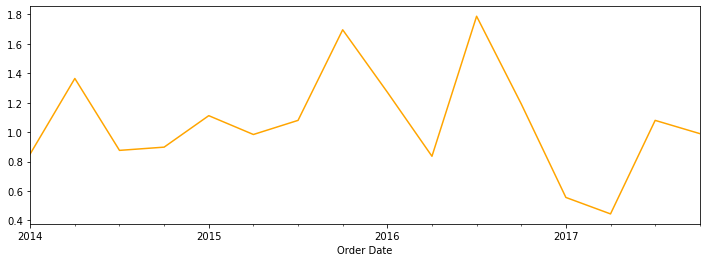

In [33]:
df.resample(rule='QS').min()['Sales'].plot(figsize=(12,4),c='orange')
plt.show()

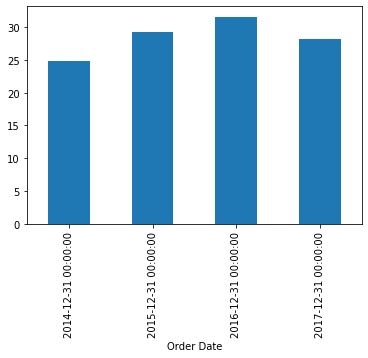

In [35]:
df.resample(rule='A').mean()['Profit'].plot(kind='bar')
plt.show()

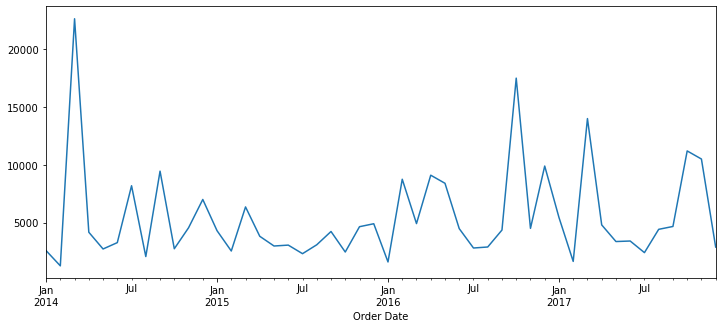

In [37]:
#MONTHLY
df.resample(rule='M').max()['Sales'].plot(figsize= (12,5))
plt.show()

In [38]:
#simple moving average (we are actually smoothening the curve)
df['Sales'].rolling(10).mean().head(20)

Order Date
2016-11-08          NaN
2016-11-08          NaN
2016-06-12          NaN
2015-10-11          NaN
2015-10-11          NaN
2014-06-09          NaN
2014-06-09          NaN
2014-06-09          NaN
2014-06-09          NaN
2014-06-09    308.51615
2014-06-09    452.93855
2014-06-09    470.88695
2017-04-15    470.98015
2016-12-05    416.02000
2015-11-22    420.66420
2015-11-22    416.03260
2014-11-11    481.89260
2014-05-13    396.72740
2014-08-27    395.73300
2014-08-27    405.59100
Name: Sales, dtype: float64

In [39]:
df['Sales: 10 days rolling']=df['Sales'].rolling(window=10, min_periods=1).mean()
df['Sales: 30 days rolling']=df['Sales'].rolling(window=30, min_periods=1).mean()
df['Sales: 50 days rolling']=df['Sales'].rolling(window=50, min_periods=1).mean()

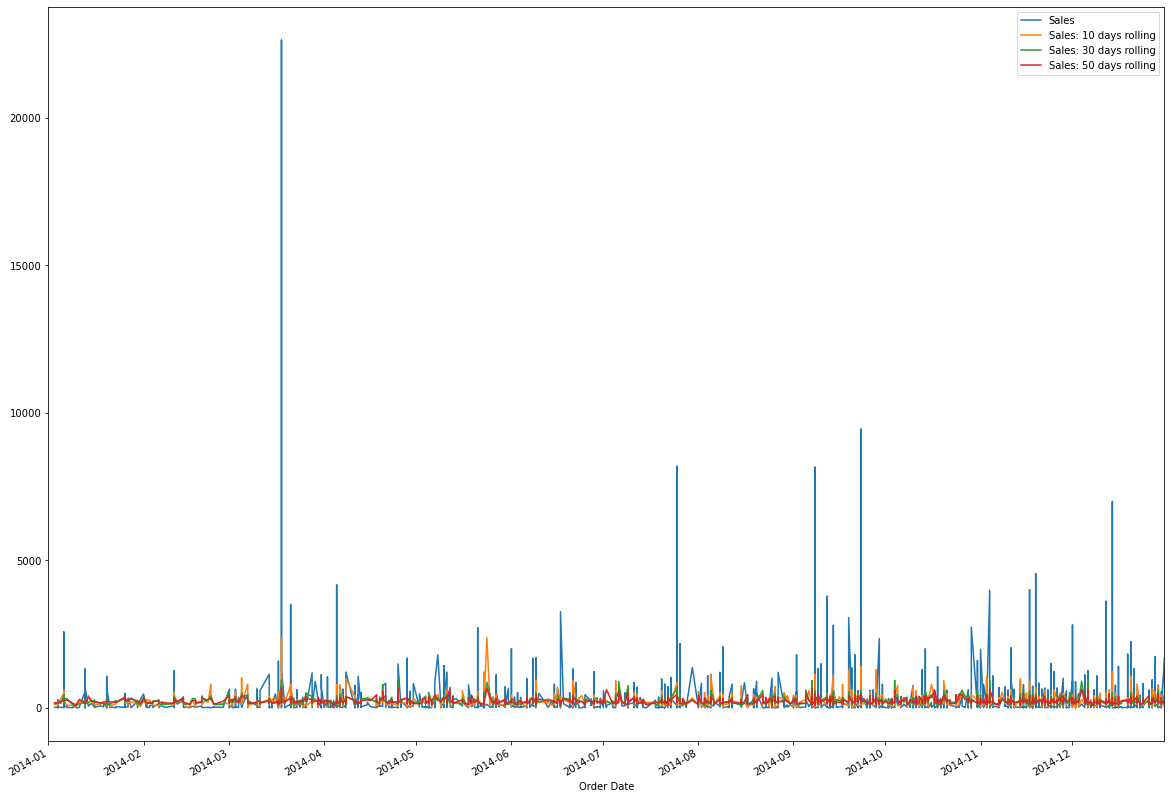

In [41]:
df[['Sales', 'Sales: 10 days rolling','Sales: 30 days rolling', 'Sales: 50 days rolling']].plot(xlim=['2014-01-01', '2014-12-31'],figsize= (20,15));

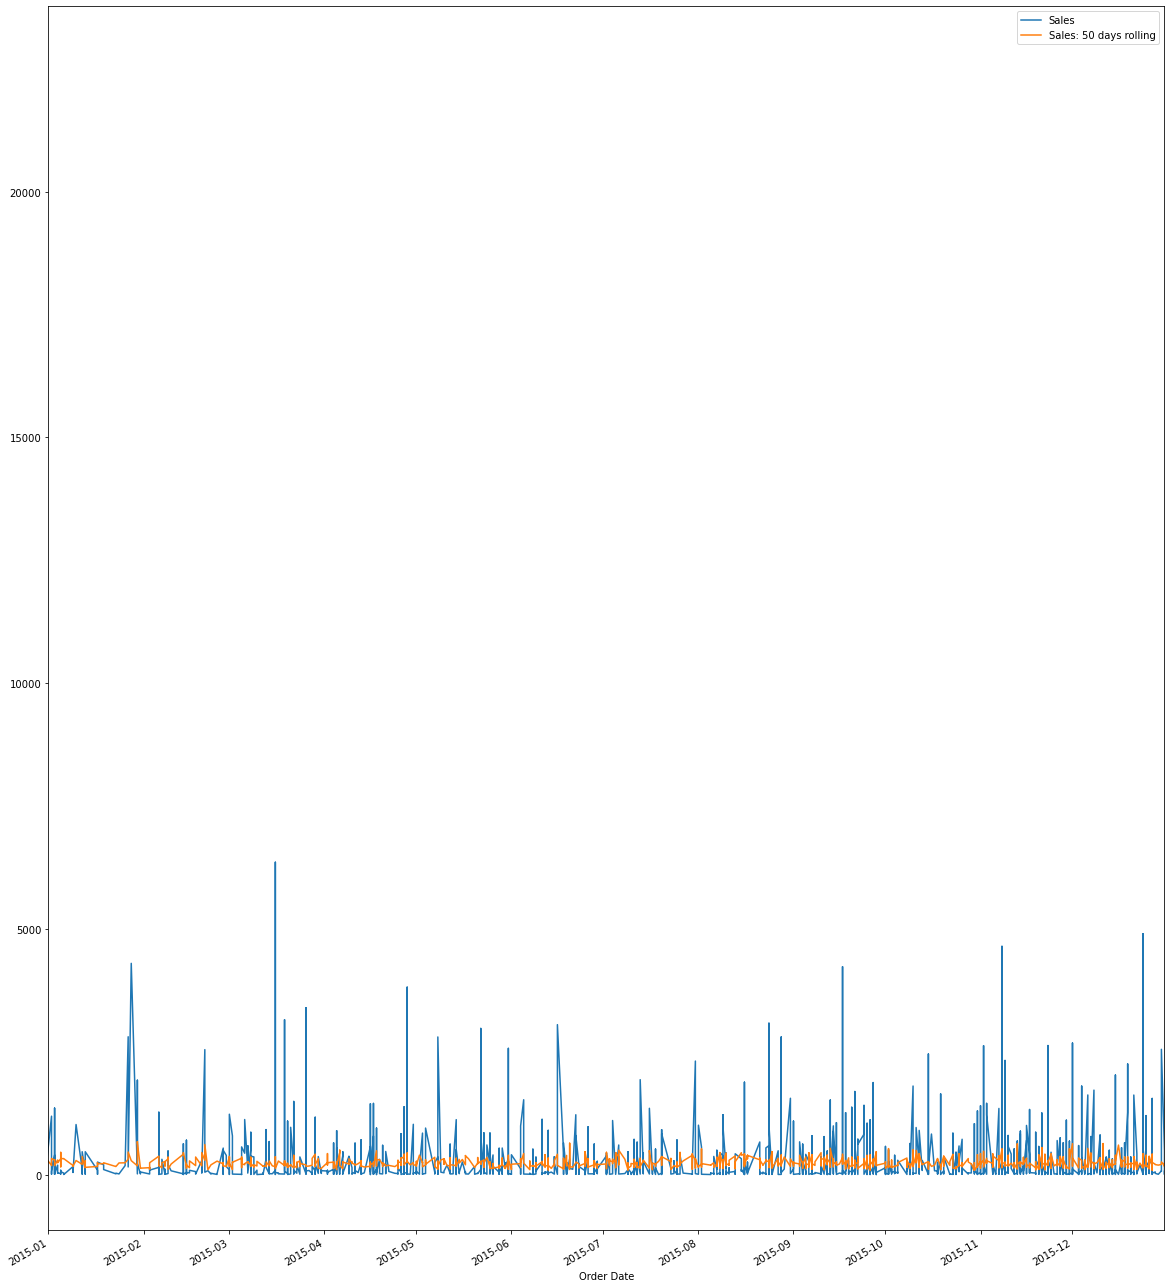

In [42]:
df[['Sales', 'Sales: 50 days rolling']].plot(xlim=['2015-01-01', '2015-12-31'],figsize= (20,25));

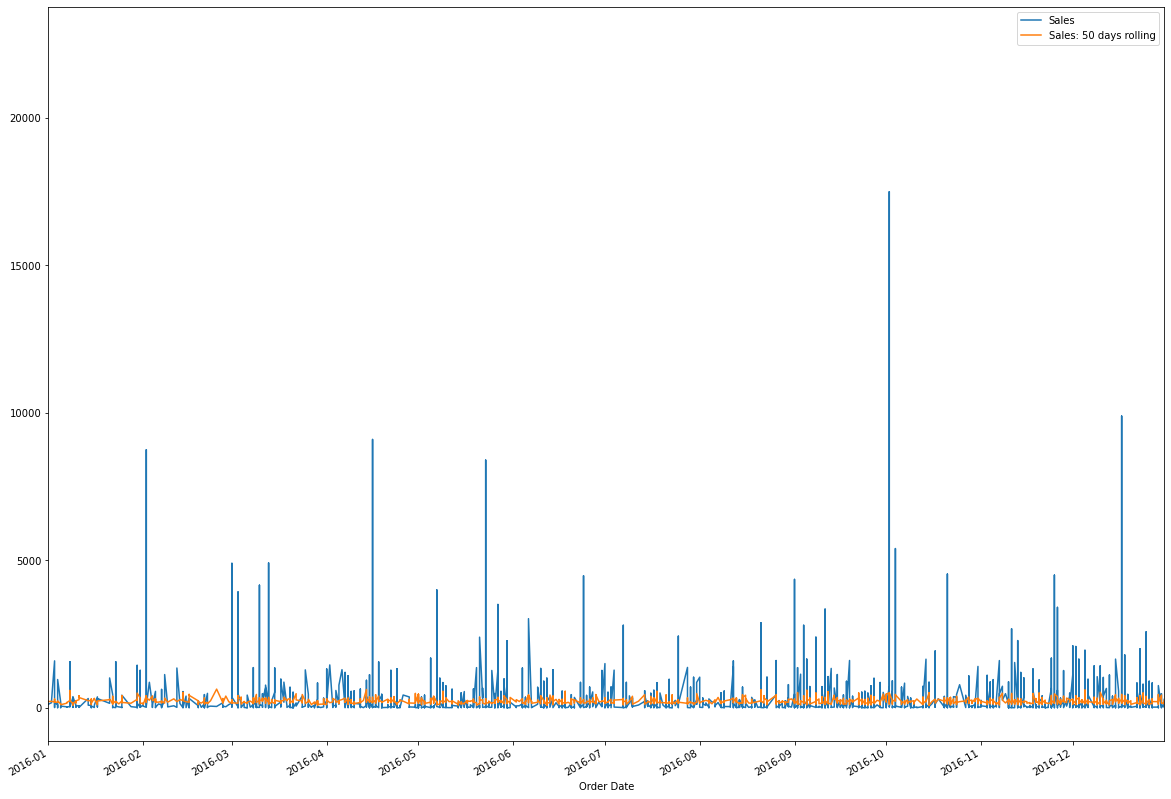

In [107]:
df[['Sales', 'Sales: 50 days rolling']].plot(xlim=['2016-01-01', '2016-12-31'],figsize= (20,15));

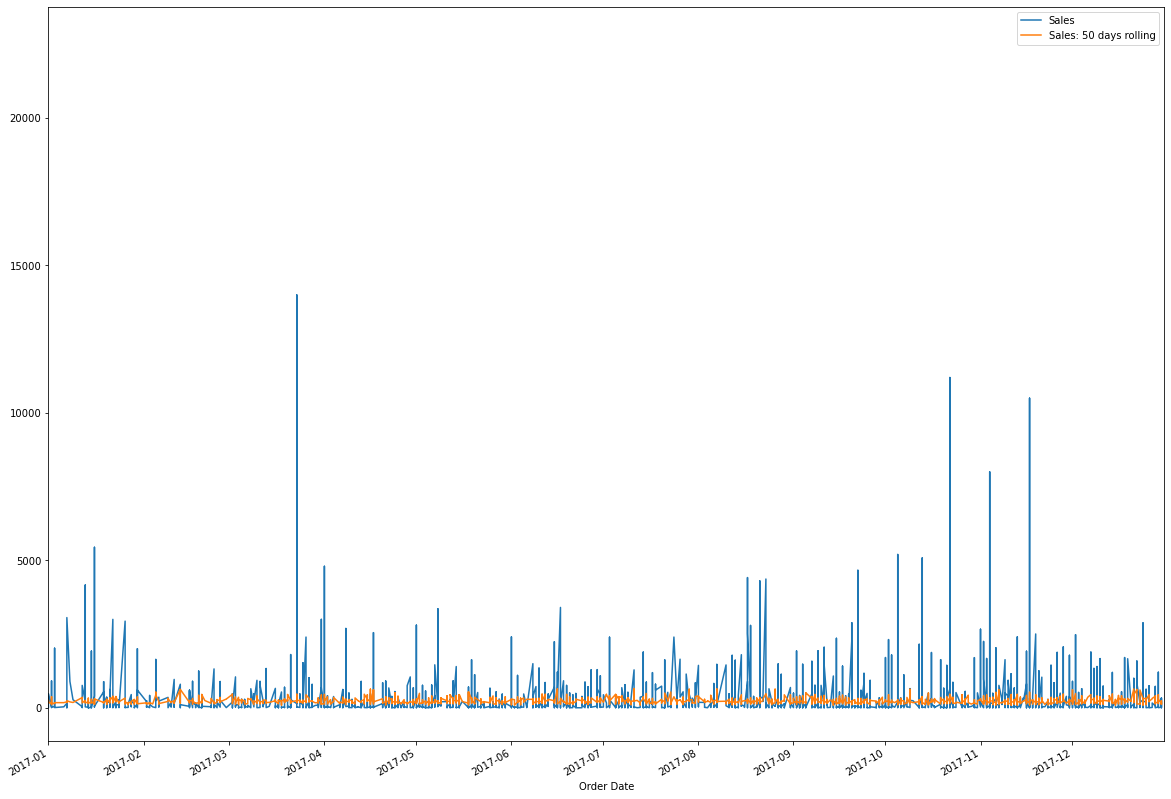

In [106]:
df[['Sales', 'Sales: 50 days rolling']].plot(xlim=['2017-01-01', '2017-12-31'],figsize= (20,15));

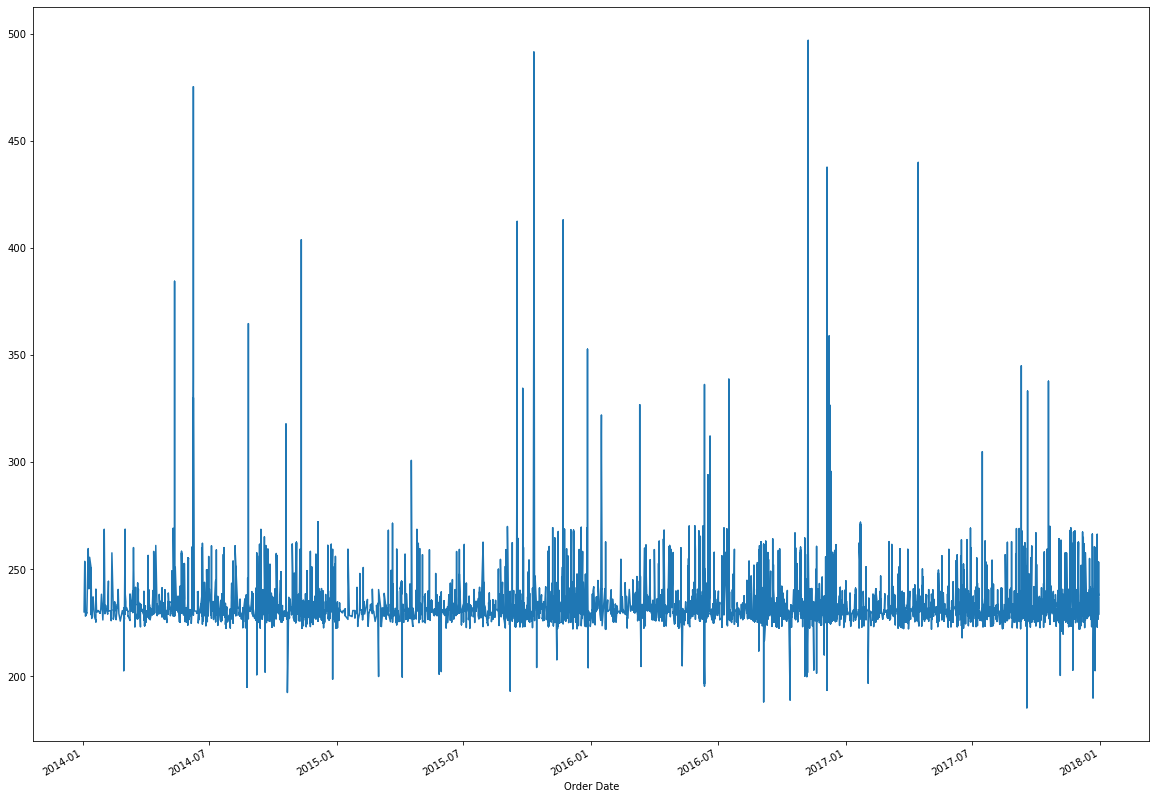

In [43]:
#cumulative moving average
df['Sales'].expanding().mean().plot(figsize = (20,15));

In [44]:
#exponential moving average
df['EMA_0.1'] = df['Sales'].ewm(alpha=0.1, adjust =False).mean()

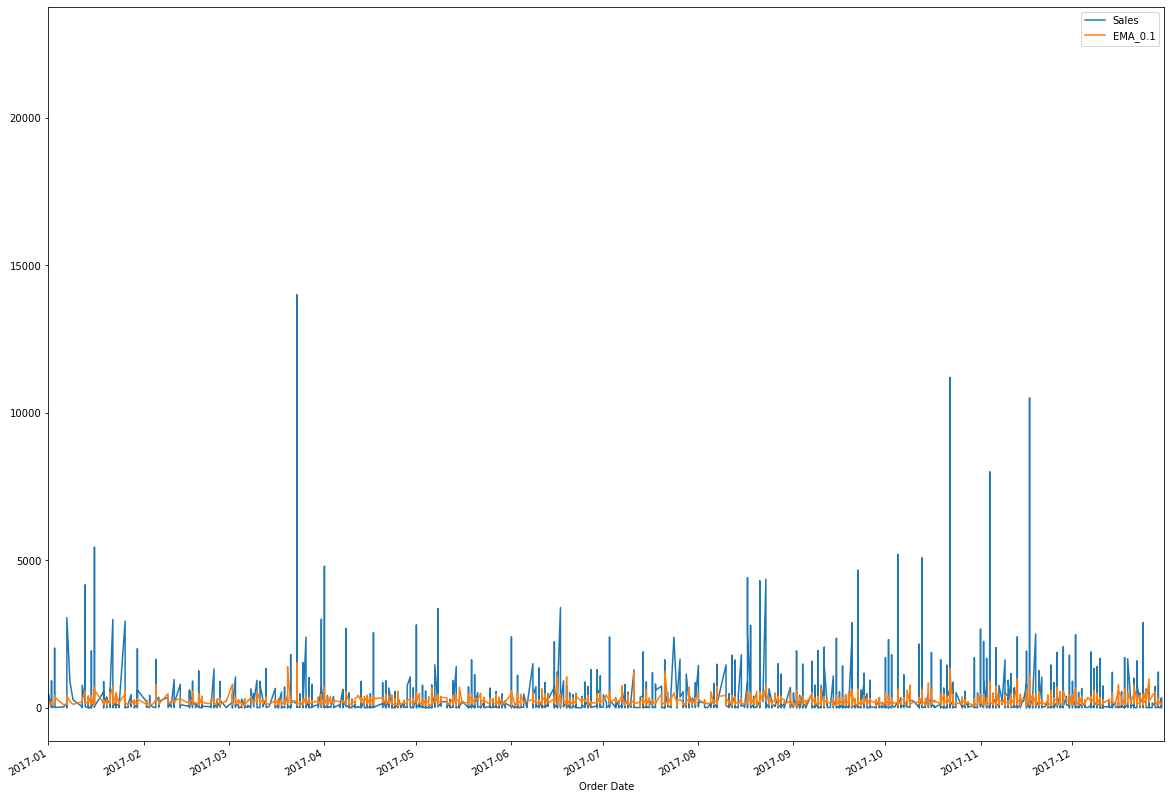

In [45]:
df[['Sales', 'EMA_0.1']].plot(xlim=['2017-01-01', '2017-12-31'],figsize= (20,15));

In [46]:
#checking for unique values in columns
{column: len(df[column].unique()) for column in df.columns}

{'Row ID': 9994,
 'Order ID': 5009,
 'Ship Date': 1334,
 'Ship Mode': 4,
 'Customer ID': 793,
 'Customer Name': 793,
 'Segment': 3,
 'Country': 1,
 'City': 531,
 'State': 49,
 'Postal Code': 631,
 'Region': 4,
 'Product ID': 1862,
 'Category': 3,
 'Sub-Category': 17,
 'Product Name': 1850,
 'Sales': 6144,
 'Quantity': 14,
 'Discount': 12,
 'Profit': 7545,
 'Sales: 10 days rolling': 9992,
 'Sales: 30 days rolling': 9985,
 'Sales: 50 days rolling': 9992,
 'EMA_0.1': 9994}

In [47]:
df = df.copy()
#dropping unnecessary columns    
df = df.drop(['Row ID','Country','Customer Name','Product Name','Order ID','Customer ID'],axis=1)

In [48]:
df.shape

(9994, 18)

In [50]:
#checking for missing values
df.isna().sum()

Ship Date                 0
Ship Mode                 0
Segment                   0
City                      0
State                     0
Postal Code               0
Region                    0
Product ID                0
Category                  0
Sub-Category              0
Sales                     0
Quantity                  0
Discount                  0
Profit                    0
Sales: 10 days rolling    0
Sales: 30 days rolling    0
Sales: 50 days rolling    0
EMA_0.1                   0
dtype: int64

In [51]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [52]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [53]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [54]:
#checking datatypes present in dataset
df.dtypes

Ship Date                 datetime64[ns]
Ship Mode                         object
Segment                           object
City                              object
State                             object
Postal Code                        int64
Region                            object
Product ID                        object
Category                          object
Sub-Category                      object
Sales                            float64
Quantity                           int64
Discount                         float64
Profit                           float64
Sales: 10 days rolling           float64
Sales: 30 days rolling           float64
Sales: 50 days rolling           float64
EMA_0.1                          float64
dtype: object

In [55]:
furniture_data = df.loc[df['Category'] == 'Furniture']
furniture_data

,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales: 10 days rolling,Sales: 30 days rolling,Sales: 50 days rolling,EMA_0.1
Order Date,,,,,,,,,,,,,,,,,,
2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136,261.960000,261.960000,261.960000,261.960000
2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820,496.950000,496.950000,496.950000,308.958000
2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310,491.524375,491.524375,491.524375,347.329530
2014-06-09,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,48.8600,7,0.00,14.1694,339.554250,339.554250,339.554250,288.236039
2014-06-09,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,1706.1840,9,0.20,85.3092,452.938550,435.576864,435.576864,419.267744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-19,2015-03-22,First Class,Home Office,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,383.4656,4,0.32,-67.6704,106.825960,252.698920,270.595832,216.277533
2016-12-05,2016-12-10,Second Class,Corporate,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,13.4000,1,0.00,6.4320,105.129960,246.878587,270.190992,177.457921
2015-09-06,2015-09-09,Second Class,Consumer,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,85.9800,1,0.00,22.3548,134.460000,118.081053,213.915752,153.154474


In [56]:
furniture_data.drop(['Ship Date','Ship Mode','Segment','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Quantity','Discount','Profit'],axis=1, inplace=True)

In [58]:
furniture_data

,Sales,Sales: 10 days rolling,Sales: 30 days rolling,Sales: 50 days rolling,EMA_0.1
Order Date,,,,,
2016-11-08,261.9600,261.960000,261.960000,261.960000,261.960000
2016-11-08,731.9400,496.950000,496.950000,496.950000,308.958000
2015-10-11,957.5775,491.524375,491.524375,491.524375,347.329530
2014-06-09,48.8600,339.554250,339.554250,339.554250,288.236039
2014-06-09,1706.1840,452.938550,435.576864,435.576864,419.267744
...,...,...,...,...,...
2015-03-19,383.4656,106.825960,252.698920,270.595832,216.277533
2016-12-05,13.4000,105.129960,246.878587,270.190992,177.457921
2015-09-06,85.9800,134.460000,118.081053,213.915752,153.154474


In [59]:
furniture_data = furniture_data.sort_values('Order Date')
furniture_data

,Sales,Sales: 10 days rolling,Sales: 30 days rolling,Sales: 50 days rolling,EMA_0.1
Order Date,,,,,
2014-01-06,2573.820,465.2098,392.404133,254.68494,521.981830
2014-01-07,76.728,86.6172,311.827867,270.97416,230.751626
2014-01-10,51.940,37.7324,65.065667,105.61844,61.370003
2014-01-11,9.940,204.9678,141.473067,283.01230,180.144879
2014-01-13,545.940,135.9598,115.856233,146.14006,149.857663
...,...,...,...,...,...
2017-12-29,258.750,256.9510,215.616467,196.61004,264.688506
2017-12-29,1207.840,325.3612,240.091400,257.40564,317.041441
2017-12-29,101.120,441.7312,208.678000,147.30220,310.246412


In [60]:
furniture_data = furniture_data.set_index('Order Date')
furniture_data

KeyError: "None of ['Order Date'] are in the columns"

In [61]:
furniture_data.describe()

,Sales,Sales: 10 days rolling,Sales: 30 days rolling,Sales: 50 days rolling,EMA_0.1
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,349.834887,241.797159,233.022113,232.479630,243.146693
std,503.179145,189.722841,114.993937,87.244818,137.664209
min,1.892000,23.779200,55.876800,84.421580,57.465748
25%,47.040000,127.026400,156.827440,171.800280,154.048065
50%,182.220000,194.861400,208.315267,213.418420,211.514678
75%,435.168000,298.578200,275.136467,274.695840,292.523225
max,4416.174000,2381.686400,929.147100,670.738980,1771.478994


In [62]:
furniture_data.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-28', '2017-12-28', '2017-12-28', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [63]:
y_office = furniture_data['Sales'].resample('MS').mean()
y_office

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

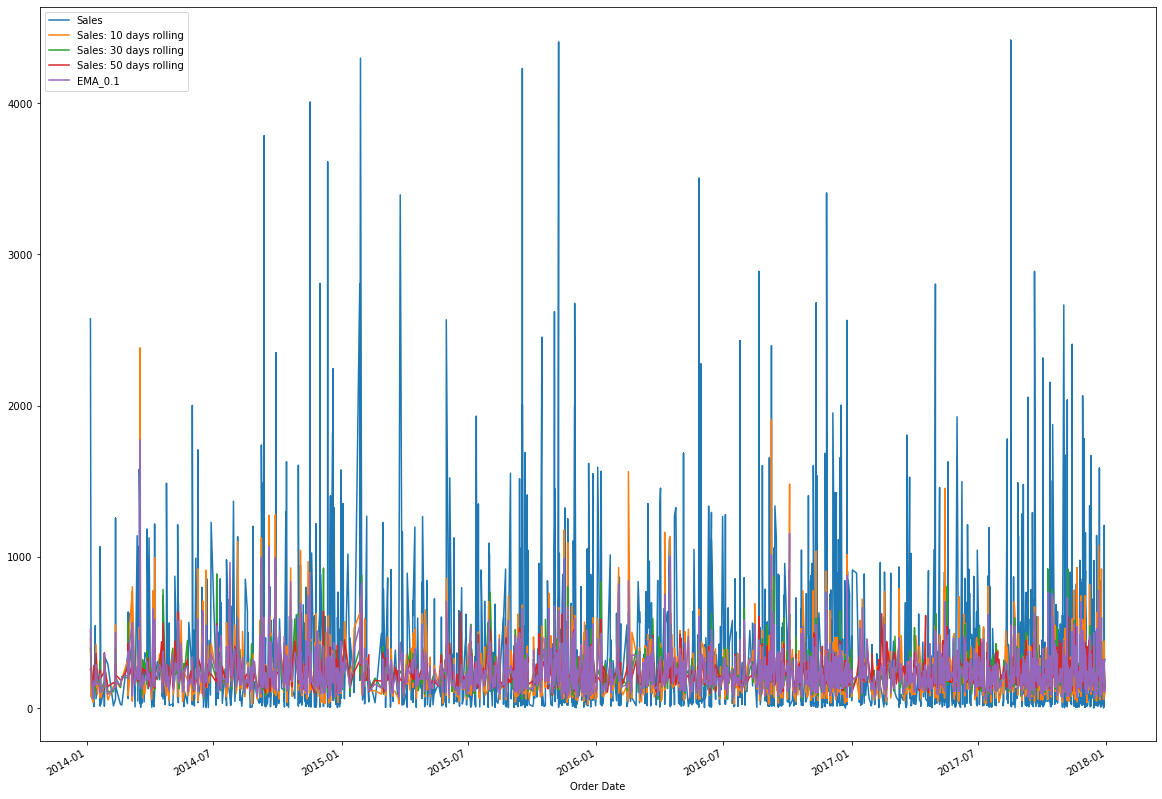

In [65]:
furniture_data.plot(figsize=(20,15));

In [ ]:
#testing for stationarity

In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:
test_result = adfuller(df['Sales'])

In [68]:
#H0 : It is non stationary
#H1 : It is stationery

def adfuller_test(Sales):
    result = adfuller(Sales)
    labels = ['ADF test statistic', 'p-value', 'Number of observations used', '#lags used']
    for value, label in zip(result, labels):
        print(label+' :'+str(value))
    if result[1] <= 0.05:
        print("Reject null hypotheses")
    else:
        print("it is not stationary")

In [69]:
adfuller_test(df['Sales'])

ADF test statistic :-99.26079402596325
p-value :0.0
Number of observations used :0
#lags used :9993
Reject null hypotheses


In [70]:
office_supplies_data = df.loc[df['Category'] == 'Office Supplies']
office_supplies_data

,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales: 10 days rolling,Sales: 30 days rolling,Sales: 50 days rolling,EMA_0.1
Order Date,,,,,,,,,,,,,,,,,,
2016-06-12,2016-06-16,Second Class,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,14.620,2,0.0,6.8714,336.173333,336.173333,336.173333,279.524200
2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,22.368,2,0.2,2.5164,397.693100,397.693100,397.693100,314.833377
2014-06-09,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,7.280,4,0.0,1.9656,292.086500,292.086500,292.086500,260.140435
2014-06-09,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,18.504,3,0.2,5.7825,330.029056,330.029056,330.029056,294.207833
2014-06-09,2014-06-14,Standard Class,Consumer,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,114.900,5,0.0,34.4700,308.516150,308.516150,308.516150,276.277049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-22,2016-09-28,Standard Class,Consumer,Grand Rapids,Michigan,49505,Central,OFF-PA-10002195,Office Supplies,Paper,35.560,7,0.0,16.7132,115.636200,117.395587,200.691512,129.097924
2015-05-17,2015-05-23,Standard Class,Consumer,Long Beach,New York,11561,East,OFF-LA-10003766,Office Supplies,Labels,31.500,10,0.0,15.1200,99.519200,120.353987,199.313552,116.537518
2015-05-17,2015-05-23,Standard Class,Consumer,Long Beach,New York,11561,East,OFF-SU-10000898,Office Supplies,Supplies,55.600,4,0.0,16.1240,103.743200,113.088387,199.690672,110.443766


In [71]:
office_supplies_data.drop(['Ship Date','Ship Mode','Segment','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Quantity','Discount','Profit'],axis=1, inplace=True)

In [72]:
office_supplies_data = office_supplies_data.sort_values('Order Date')

In [73]:
office_supplies_data.describe()

,Sales,Sales: 10 days rolling,Sales: 30 days rolling,Sales: 50 days rolling,EMA_0.1
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000
mean,119.324101,217.368094,226.029434,227.611373,217.507498
std,382.182228,188.102801,109.769686,85.503774,132.442399
min,0.444000,9.308100,39.816667,84.464380,46.184876
25%,11.760000,107.976000,150.675317,168.203525,137.351110
50%,27.418000,167.972700,201.605687,209.700710,185.509485
75%,79.920000,265.749150,269.966778,267.100725,259.770526
max,9892.740000,2392.678800,936.934300,678.184890,2182.321918


In [74]:
office_supplies_data = office_supplies_data.set_index('Order Date')

KeyError: "None of ['Order Date'] are in the columns"

In [75]:
office_supplies_data.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=6026, freq=None)

In [76]:
y_office = office_supplies_data['Sales'].resample('MS').mean()
y_office

Order Date
2014-01-01     97.021600
2014-02-01     34.571742
2014-03-01     84.371363
2014-04-01    134.398482
2014-05-01    100.501746
2014-06-01    154.202821
2014-07-01    184.404976
2014-08-01    111.563353
2014-09-01    165.200590
2014-10-01     74.341526
2014-11-01    137.756082
2014-12-01    116.925078
2015-01-01     56.524375
2015-02-01    137.642744
2015-03-01    193.689598
2015-04-01    139.539533
2015-05-01     96.954638
2015-06-01    125.267612
2015-07-01     60.512038
2015-08-01    122.240708
2015-09-01    104.355497
2015-10-01     97.454045
2015-11-01    114.075968
2015-12-01     87.576616
2016-01-01    117.770711
2016-02-01    141.548958
2016-03-01    204.081541
2016-04-01     94.225195
2016-05-01     93.108586
2016-06-01     87.214480
2016-07-01    100.972219
2016-08-01     81.452182
2016-09-01    101.146687
2016-10-01    136.821798
2016-11-01     94.848509
2016-12-01    183.563121
2017-01-01    212.742890
2017-02-01    125.555458
2017-03-01    100.346800
2017-04-01    

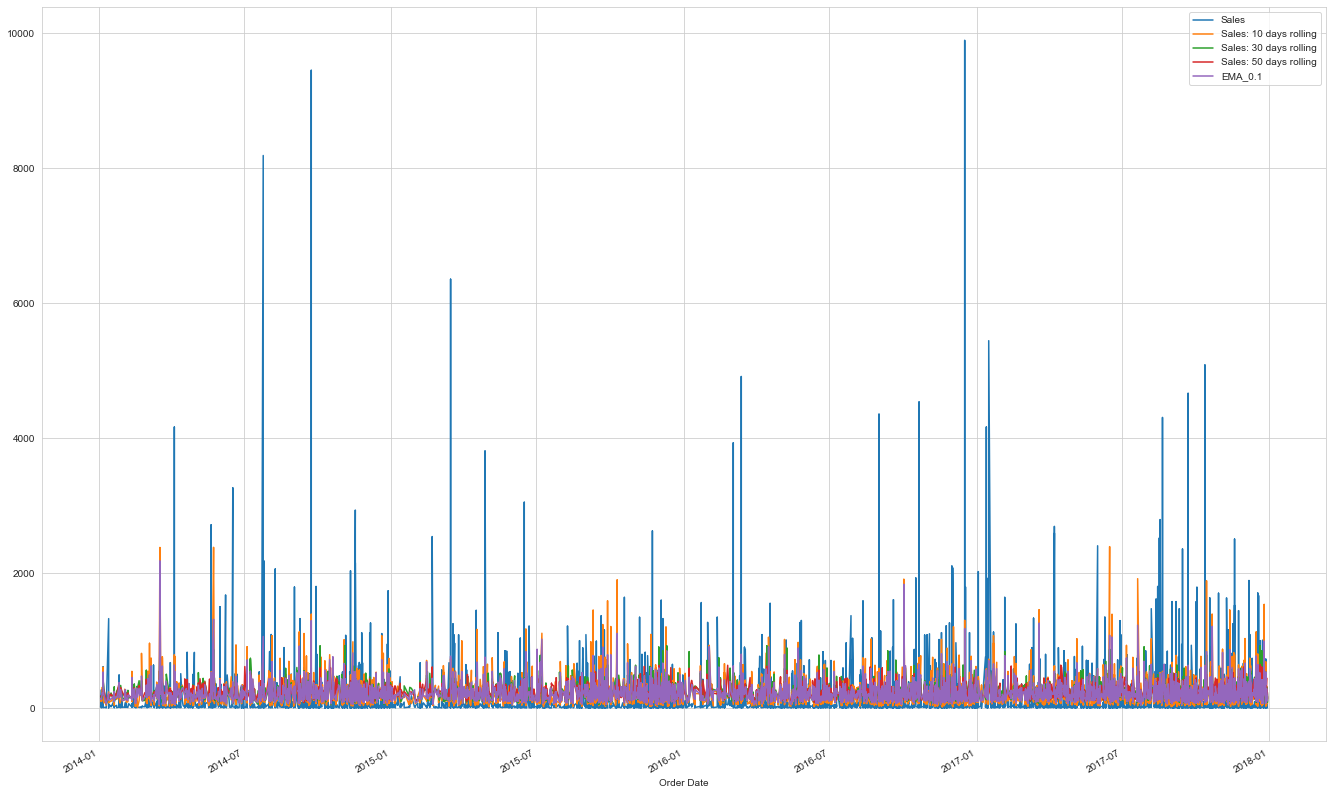

In [79]:
sns.set_style('whitegrid')
office_supplies_data.plot(figsize=(23,15));